In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split

In [2]:
dfA = pd.read_csv("wbc.csv")

In [3]:
dfA=dfA.replace('?',np.nan)
dfA['bare_nuclei'] = pd.to_numeric(dfA.bare_nuclei.fillna(dfA.bare_nuclei.median()))
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [4]:
X = dfA.drop([dfA.columns[-1]], axis=1)
y = dfA.jenis.map({2: 0, 4: 1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [6]:
from sklearn import svm

In [7]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [8]:
from sklearn import metrics

In [9]:
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [10]:
svr=svm.SVC()

In [11]:
gamma_range = [2**i for i in [-15, -13, -11, -9, -7, -5, -3, -1, 1, 3]]

In [12]:
gamma_range

[3.0517578125e-05,
 0.0001220703125,
 0.00048828125,
 0.001953125,
 0.0078125,
 0.03125,
 0.125,
 0.5,
 2,
 8]

In [13]:
C_range = [2**i for i in [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]]

In [14]:
C_range

[0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048, 8192, 32768]

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((228.35*FP)+(2850000*FN))
    return costBC

In [17]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [18]:
from sklearn.metrics import make_scorer
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=False)
score_specificity=make_scorer(specificity, greater_is_better=True)

In [19]:
print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},]

scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(svr, tuned_parameters, cv=10,
                       scoring=my_custom_scorer)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer, greater_is_better=False)

Best parameters set found on development set:

{'C': 0.125, 'kernel': 'rbf', 'gamma': 0.125}

Grid scores on development set:

-46769230.769 (+/-2803716.891) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 3.0517578125e-05}
-46769230.769 (+/-2803716.891) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.0001220703125}
-43919230.769 (+/-6856780.862) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.00048828125}
-4543132.179 (+/-8915185.777) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.001953125}
-2277792.453 (+/-6163096.114) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.0078125}
-865131.004 (+/-3678378.210) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.03125}
-292968.346 (+/-1729177.839) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.125}
-46769230.769 (+/-2803716.891) for {'C': 0.03125, 'kernel': 'rbf', 'gamma': 0.5}
-46769230.769 (+/-28037

In [22]:
print("Best recall obtained: {0}".format(clf2.best_score_))
print("Parameters:")
for key, value in clf2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best recall obtained: -727.9876068376069
Parameters:
	C: 0.125
	kernel: rbf
	gamma: 0.125


In [23]:
clf2.best_estimator_

SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
svc7=svm.SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svc7.fit(X_train,y_train)

SVC(C=0.125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred7 = svc7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred7)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred7)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9351
Precision: 0.8370
Recall: 1.0000
F1: 0.9112


In [27]:
confusion_matrix(y_test, y_pred7)

array([[139,  15],
       [  0,  77]])

In [28]:
y_test.shape

(231,)

In [29]:
y_pred7.shape

(231,)

In [30]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc7,X_train,y_train,cv=10)

In [31]:
scores1=cross_val_score(svc7,X_train,y_train,cv=10)

In [32]:
scores

array([ 0.97916667,  0.91666667,  0.95833333,  0.9375    ,  0.93478261,
        0.91304348,  0.91304348,  0.95652174,  0.84782609,  0.95652174])

In [33]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.9313 (+/- 0.0698)


In [34]:
scores=cross_val_score(svc7,X_train,y_train,cv=10,scoring='recall')

In [35]:
print("recall: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

recall: 1.0000 (+/- 0.0000)


In [36]:
scores=cross_val_score(svc7,X_train,y_train,cv=10,scoring=score_specificity)

In [37]:
print("specificity: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

specificity: 0.8944 (+/- 0.1070)


In [38]:
classifier=svc7

In [39]:
names='SVM-RBF-Dataset A'

In [40]:
score=svc7.predict_proba(X_test)

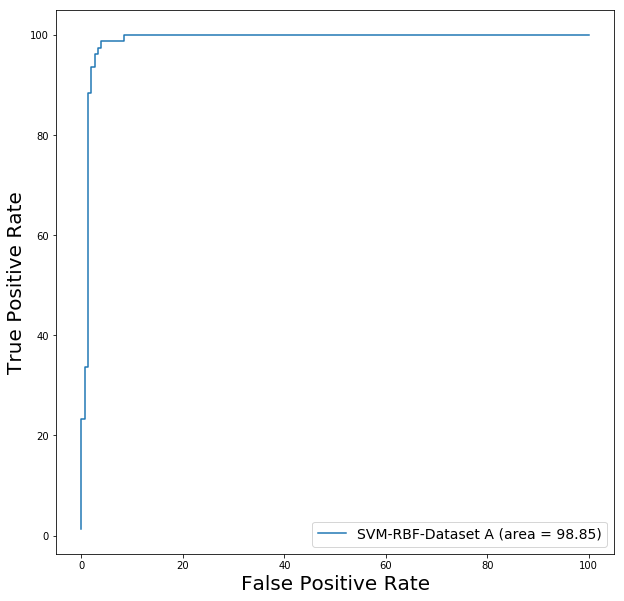

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fpr, tpr, thresholds = roc_curve(y_test, score[:,1])
auc = roc_auc_score(y_test, score[:,1])
plt.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names, auc*100))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.legend(prop={'size':14})
ax.set_xlabel('False Positive Rate',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
plt.show()